In [127]:
# import
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


## factory model

In [128]:
Num=100
D=np.ones(Num)*2
D=np.random.rand(Num)

def factory_gen(D,Num,days=100,exp=1):
    # 设置初始状态列表 Salary, Consumption, Investment, Deposits
    S=np.ones(Num)*1
    C=np.ones(Num)*1
    interest=0.1
    I=D+S-C
    Ds=[]
    cash=0+I.sum() # factory 的 cash
    netR=cash*interest # 收益

    R=netR*0.5*I/I.sum() # 收益的一半拿去分配
    cash+=netR*0.5 # 收益的另一半拿去 cash 中
    Ds.append(D.copy())
    for day in range(days):
        add=S-C+R
        D+=add
        I=D

        cash+=(add).sum()
        netR=cash*interest
        R=netR*0.5*I**exp/(I**exp).sum()
        cash+=netR*0.5

        Ds.append(D.copy())

    return np.array(Ds)


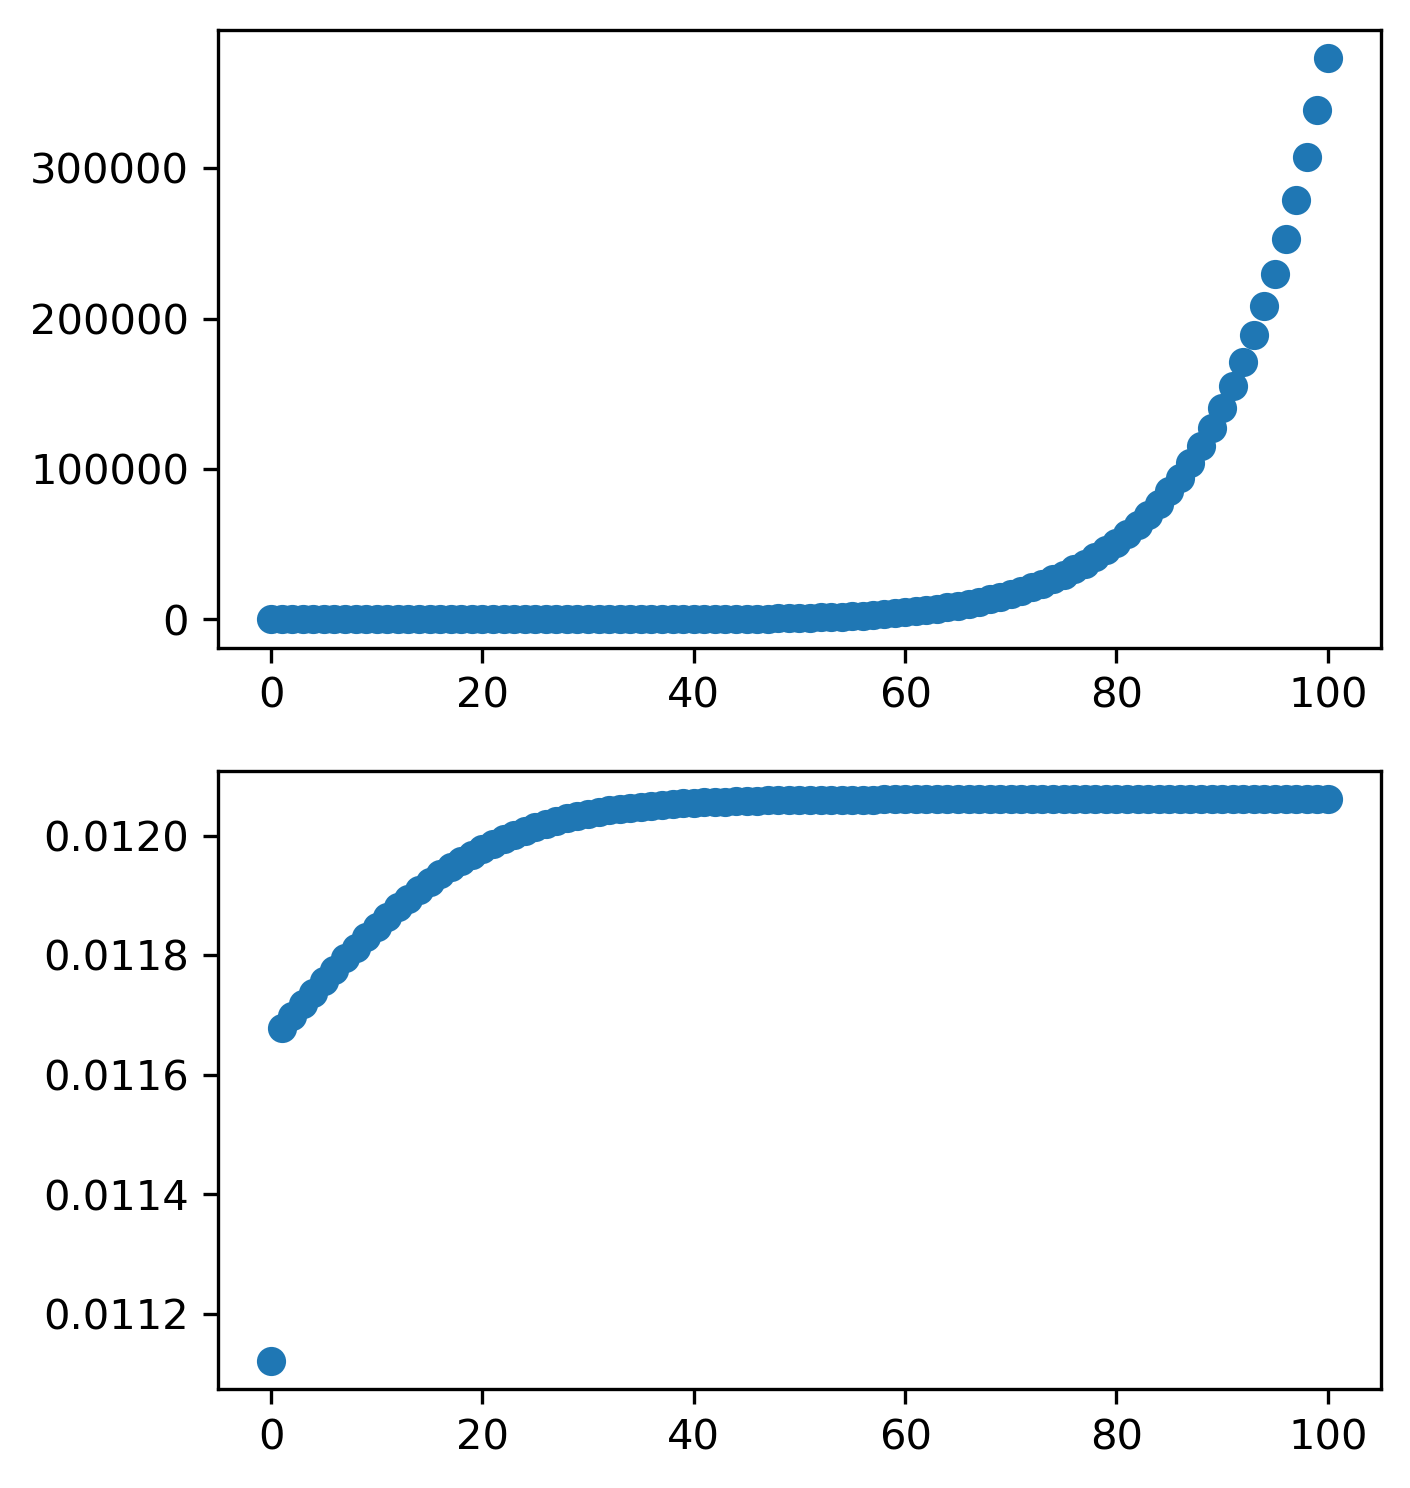

In [129]:
# fig,ax=plt.subplots(figsize=(5,5),dpi=300)
fig=plt.figure(figsize=(5,6),dpi=300)

Num=100
D=np.random.rand(Num)

max_x=np.where(D==np.max(D))
D[max_x]
min_x=np.where(D==np.min(D))

# ax.plot(D,'*')
# ax.scatter(max_x,D[max_x],marker="o",s=200,c='none',edgecolor='red')
# ax.plot(max_x,D[max_x],marker="o",ms=100,c='none',markeredgecolor='red')
day=100

Ds=factory_gen(D,Num,days=day,exp=1.83)
ax=fig.add_subplot(2,1,1)
# ax.plot(Ds[:,max_x[0]],'--')
ax.plot(Ds[:,max_x[0]],'o')

ax=fig.add_subplot(2,1,2)
ax.plot(Ds[:,min_x[0]],'o')

plt.show()

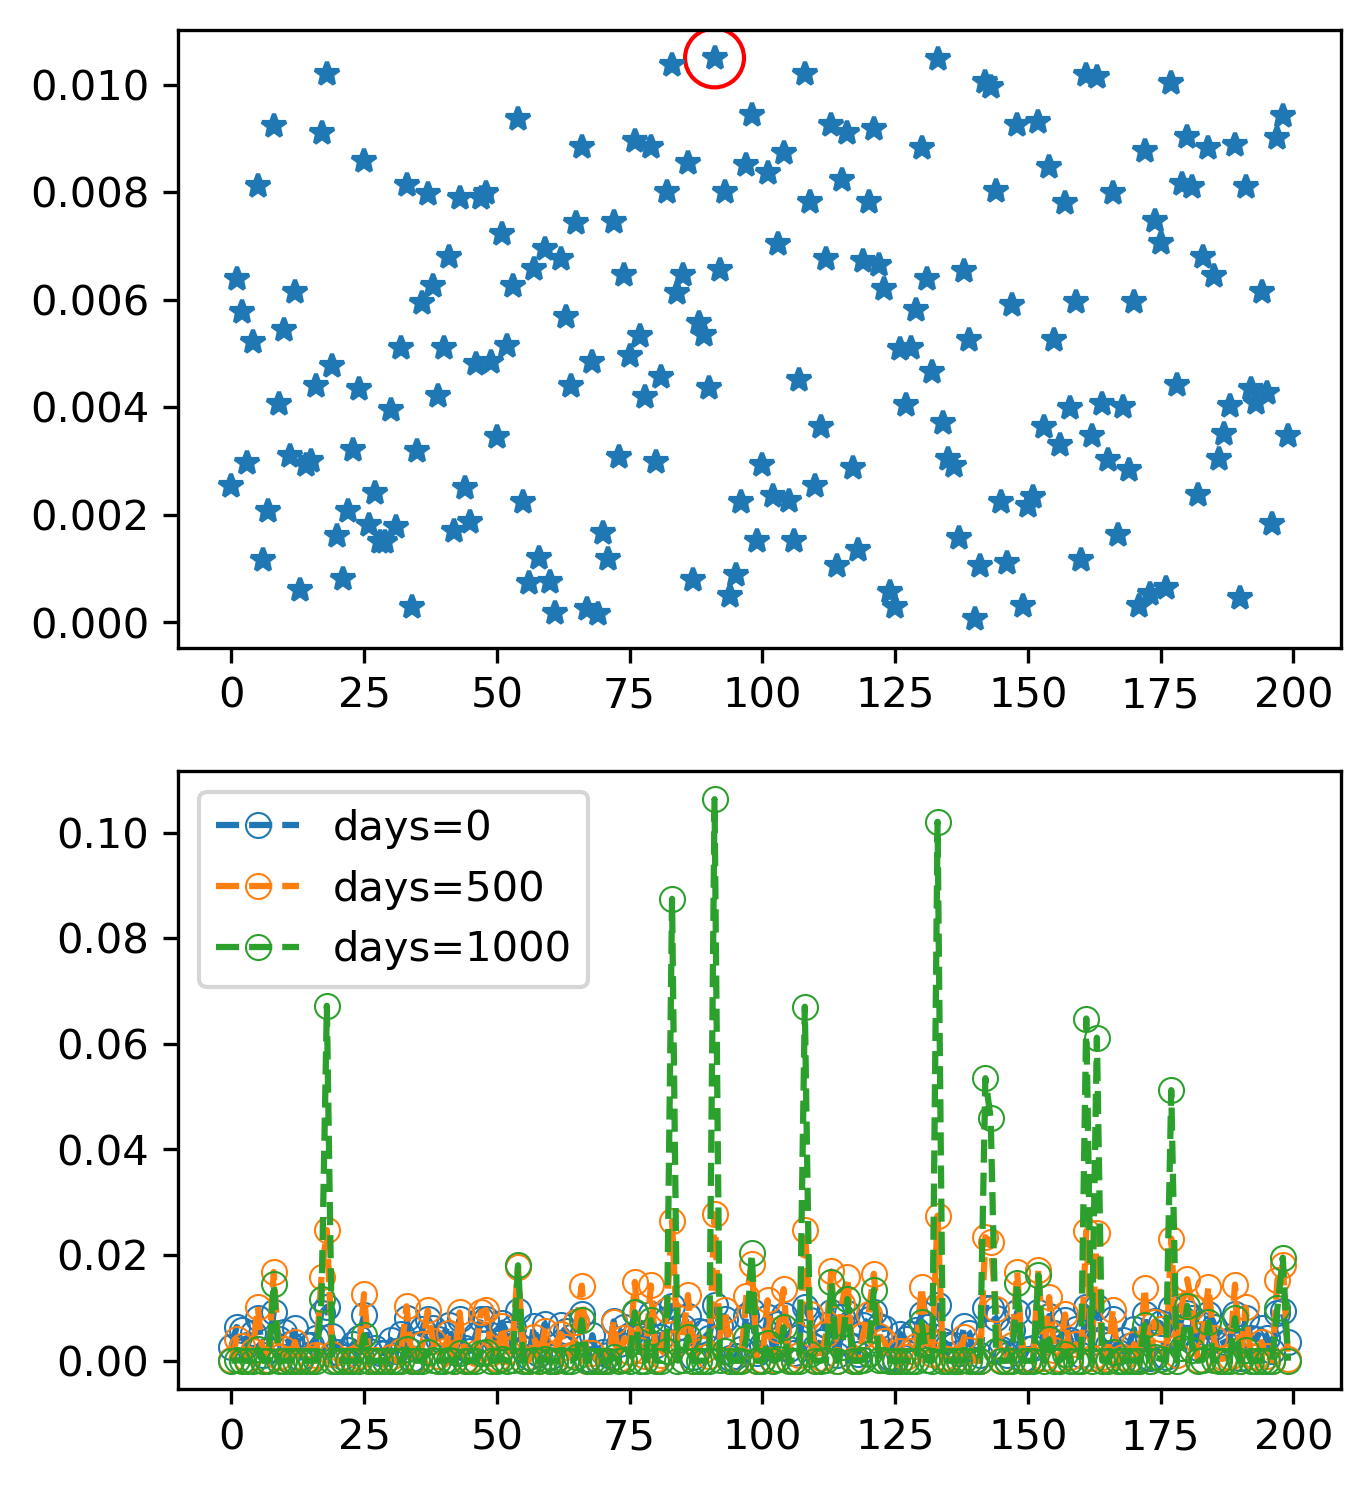

In [137]:
fig,axs=plt.subplots(2,1,figsize=(5,6),dpi=300)

Num=200
D=np.random.rand(Num)
D=D/D.sum()
max_x=np.where(D==np.max(D))
D[max_x]


ax=axs[0]
ax.plot(D,'*')
ax.scatter(max_x,D[max_x],marker="o",s=200,c='none',edgecolor='red')
# ax.plot(max_x,D[max_x],marker="o",ms=100,c='none',markeredgecolor='red')

ax=axs[1]

# for day in [10,50,300,500]:
Ds=factory_gen(D,Num,days=1000,exp=1.03)
for day in [0,500,1000]:
    D=Ds[day,:]
    ax.plot(D/D.sum(),'--',label='days=%d'%day,marker='o',markerfacecolor='none',markeredgewidth=0.5)

ax.legend()
# ax.set_xbound([-1,20])

plt.show()

## Boucnaud Pyhsica A

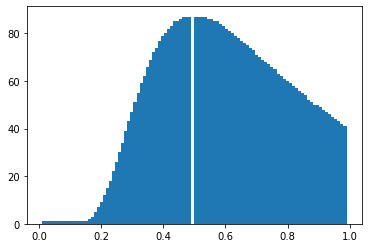

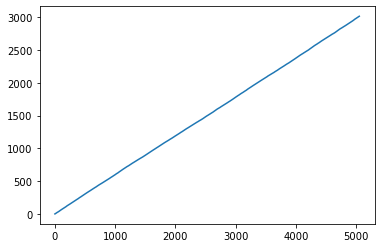

In [69]:
miu=3
# miu=0.5
w=np.arange(0.01,1,0.01)
ws=[]
for i in w:
    ws+=[np.exp(-(miu-1)/i)/i**(1+miu)]
    # ws.append(np.exp(-(miu-1)/i)/i**(1+miu))

ws=np.array(ws)/np.sum(ws)*5000
wii=[]

for i in range(len(w)):
    for j in range(int(ws[i]+1)):
        wii+=[w[i]]

plt.figure()
# plt.plot(np.cumsum(wii))
plt.hist(wii,bins=100)
plt.show()

np.random.shuffle(wii)
len(wii),np.cumsum(wii)
plt.figure()
plt.plot(np.cumsum(wii))
# plt.hist(wii,bins=100)
plt.show()


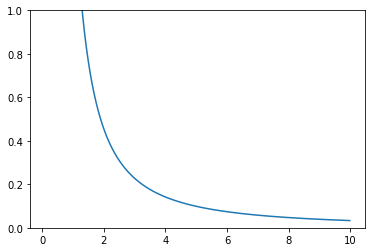

In [70]:
w=np.arange(0.1,10,0.01)
miu=3
miu=0.5
peq=np.exp(-(miu-1)/w)/w**(1+miu)

plt.figure()
plt.plot(w,peq)
# plt.hist(peq,bins=100)
plt.ylim([0,1])
plt.show()


## PNAS 2017

In [12]:
def gini(x, w=None):
    # The rest of the code requires numpy arrays.
    x = np.asarray(x)
    if w is not None:
        w = np.asarray(w)
        sorted_indices = np.argsort(x)
        sorted_x = x[sorted_indices]
        sorted_w = w[sorted_indices]
        # Force float dtype to avoid overflows
        cumw = np.cumsum(sorted_w, dtype=float)
        cumxw = np.cumsum(sorted_x * sorted_w, dtype=float)
        return (np.sum(cumxw[1:] * cumw[:-1] - cumxw[:-1] * cumw[1:]) / 
                (cumxw[-1] * cumw[-1]))
    else:
        sorted_x = np.sort(x)
        n = len(x)
        cumx = np.cumsum(sorted_x, dtype=float)
        # The above formula, with all weights equal to 1 simplifies to:
        return (n + 1 - 2 * np.sum(cumx) / cumx[-1]) / n

In [13]:
ws = np.ones(10000)
s = 1e-5
ginis = []
allweath=[]
for t in range(2000):
    ri = np.random.normal(0.05, 0.05, size=len(ws))
    ut = (s*len(ws)+(ri*ws).sum())/(ws.sum())
    ws = ws + ri*ws +s-ut * ws - 0.05 * ws ** 2
    if t % 50 == 0:
        # print("sum=%.1f,max=%.1f,min=%.1f,gini=%.1f"%(ws.sum(),ws.max(),ws.min(),gini(ws)),end='\t')
        allweath += [ws]
        ginis += [gini(ws)]
aw=np.array(allweath)


In [14]:
aw.mean(axis=0)

array([0.0574607 , 0.05412643, 0.05120377, ..., 0.05882103, 0.05189947,
       0.05774022])

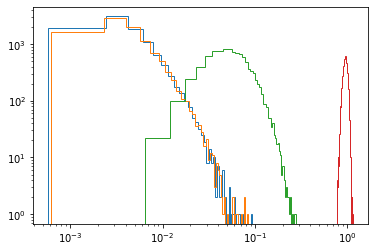

In [15]:
plt.figure()
# plt.plot(ws,'o-')
plt.hist(ws,bins=50,histtype='step')
plt.hist(aw[-1,:],bins=50,histtype='step')
plt.hist(aw[-35,:],bins=50,histtype='step')
plt.hist(aw[-40,:],bins=50,histtype='step')
# plt.hist(aw[-20,:],bins=50)
plt.yscale('log')
plt.xscale('log')
plt.show()


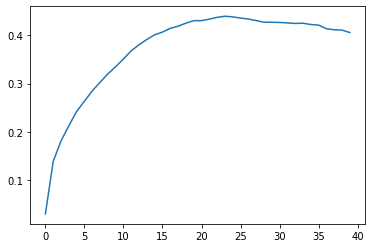

In [16]:
fig, ax = plt.subplots()
ax.plot(ginis)

plt.show()


## RE